## simple ipython notebook to intersect using geopandas 

In [22]:
import pandas as pd
import numpy as np
import geopandas as gp
from fiona.crs import from_epsg
from geopandas.tools import sjoin, overlay
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Downloading the district boundaries shapefile for LA 

In [2]:
!curl -O http://egis3.lacounty.gov/dataportal/wp-content/uploads/2011/12/DPW-Supervisorial-District.zip

In [3]:
!unzip DPW-Supervisorial-District.zip

In [4]:
district = gpd.GeoDataFrame.from_file('sup_dist_2011.shp')

In [5]:
district.head()

,OBJECTID,SUP_DIST_N,SYMBOL,PERIMETER,AREA_SQ_MI,SHAPE_AREA,SHAPE_LEN,geometry
0,1601,1,0,0.0,246.202,6.863264e+09,9.468181e+05,"POLYGON ((6475522.520815164 1854039.384190947,..."
1,1602,2,0,0.0,161.825,4.511450e+09,4.770922e+05,"POLYGON ((6468907.000064343 1855564.500267982,..."
2,1603,3,0,0.0,431.197,1.202126e+10,7.599277e+05,"POLYGON ((6408702.37511982 1944349.975085139, ..."
3,1604,4,0,0.0,439.931,1.226499e+10,2.076227e+06,(POLYGON ((6626754.675794035 1834251.849502847...
4,1605,5,0,0.0,2807.022,7.825435e+10,1.671393e+06,"POLYGON ((6408702.37511982 1944349.975085139, ..."


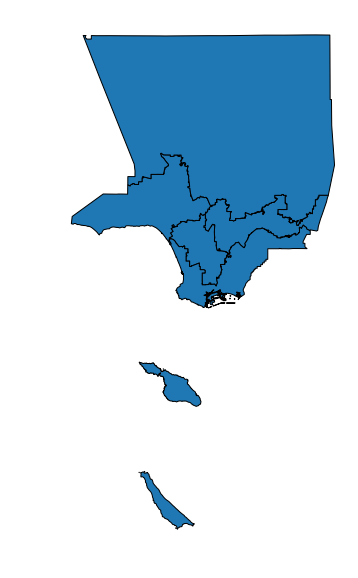

In [6]:
ax = district.plot(edgecolor='k', figsize=(10,10))
ax.axis('off');

#### Downloading census tracts shapefile for LA

In [7]:
!curl -O http://egis3.lacounty.gov/dataportal/wp-content/uploads/ShapefilePackages/CENSUS_TRACTS_2010.zip

In [8]:
!unzip CENSUS_TRACTS_2010.zip

In [9]:
tract = gpd.GeoDataFrame.from_file('CENSUS_TRACTS_2010.shp')

In [10]:
tract.head()

,GEOID10,CT10,LABEL,X_Center,Y_Center,Shape_STAr,Shape_STLe,geometry
0,06037911001,911001,9110.01,6620403.0,1998891.0,4.025736e+09,353933.808192,"POLYGON ((6661890.013041019 2025618.300745264,..."
1,06037980003,980003,9800.03,6575300.0,2112006.0,2.078690e+09,273188.863210,"POLYGON ((6597523.249386355 2100300.408598602,..."
2,06037930301,930301,9303.01,6603027.0,1932124.0,1.111802e+10,628603.531323,"POLYGON ((6665669.120312199 1967117.056199431,..."
3,06037573003,573003,5730.03,6500215.0,1747305.0,4.824002e+06,9050.008458,"POLYGON ((6501132.578979105 1748610.391507596,..."
4,06037297602,297602,2976.02,6473372.0,1719119.0,6.697031e+06,12308.315385,"POLYGON ((6474090.419808939 1721548.559804603,..."


(6255838.1457172427,
 6688130.3801468071,
 1347249.2269415162,
 2158981.3169255205)

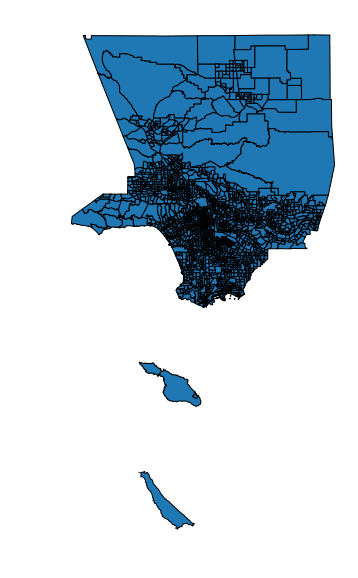

In [11]:
ax = tract.plot(edgecolor='k', figsize=(10,10))
ax.axis('off')

#### Converting both shapefiles to WGS84 coordinate system

In [12]:
district = district.to_crs(epsg=4326)
tract = tract.to_crs(epsg=4326)

In [13]:
district.crs

{'init': 'epsg:4326', 'no_defs': True}

In [14]:
tract.crs

{'init': 'epsg:4326', 'no_defs': True}

#### Using spatial join to find the intersection of 2 geographies

In [16]:
district_tract = sjoin(district, tract, how='right', op='intersects')

In [17]:
district_tract.head()

,index_left,OBJECTID,SUP_DIST_N,SYMBOL,PERIMETER,AREA_SQ_MI,SHAPE_AREA,SHAPE_LEN,GEOID10,CT10,LABEL,X_Center,Y_Center,Shape_STAr,Shape_STLe,geometry
index_right,,,,,,,,,,,,,,,,
2300,0,1601,1,0,0.0,246.202,6.863264e+09,9.468181e+05,06037406200,406200,4062.00,6592580.0,1850210.0,2.046658e+07,26508.070938,POLYGON ((-117.8989279997139 34.07899800003132...
2300,4,1605,5,0,0.0,2807.022,7.825435e+10,1.671393e+06,06037406200,406200,4062.00,6592580.0,1850210.0,2.046658e+07,26508.070938,POLYGON ((-117.8989279997139 34.07899800003132...
2227,0,1601,1,0,0.0,246.202,6.863264e+09,9.468181e+05,06037405500,405500,4055.00,6583331.0,1851097.0,1.997112e+07,20090.194612,POLYGON ((-117.9253489995382 34.08657600035887...
2299,0,1601,1,0,0.0,246.202,6.863264e+09,9.468181e+05,06037405600,405600,4056.00,6587237.0,1851388.0,2.283857e+07,23889.077451,POLYGON ((-117.9165859997849 34.08842699988993...
2299,4,1605,5,0,0.0,2807.022,7.825435e+10,1.671393e+06,06037405600,405600,4056.00,6587237.0,1851388.0,2.283857e+07,23889.077451,POLYGON ((-117.9165859997849 34.08842699988993...


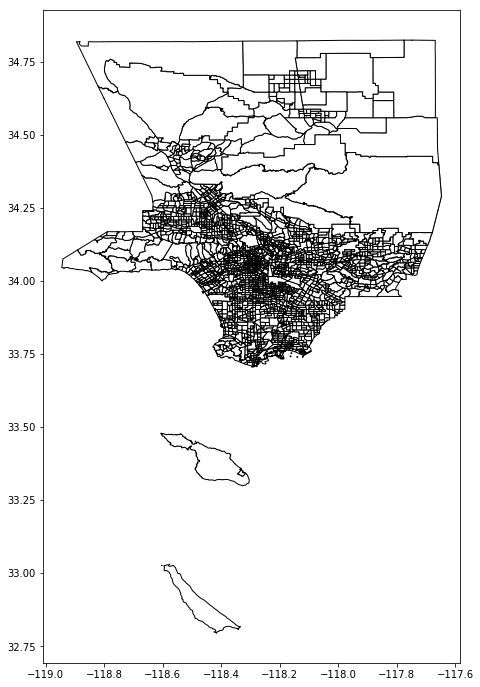

In [18]:
district_tract.plot(color='w', edgecolor='k', figsize=(12,12))

In [19]:
#intersect_shp = overlay(district, tract, how="intersection")

#### Since overlay function is time consuming and not computationally accepted, we used the following function from geopandas repo on github

In [38]:
# https://github.com/geopandas/geopandas/pull/338
def spatial_overlays(df1, df2):
    '''Compute overlay intersection of two 
        GeoPandasDataFrames df1 and df2'''
    # Spatial Index to create intersections
    spatial_index = df2.sindex
    df1['bbox'] = df1.geometry.apply(lambda x: x.bounds)
    df1['histreg']=df1.bbox.apply(lambda x:list(spatial_index.intersection(x)))
    pairs = df1['histreg'].to_dict()
    nei = []
    for i,j in pairs.items():
        for k in j:
            nei.append([i,k])
    
    pairs = gp.GeoDataFrame(nei, columns=['idx1','idx2'], crs=df1.crs)
    pairs = pairs.merge(df1, left_on='idx1', right_index=True)
    pairs = pairs.merge(df2, left_on='idx2', right_index=True, suffixes=['_1','_2'])
    pairs['Intersection'] = pairs.apply(lambda x: (x['geometry_1'].intersection(x['geometry_2'])).buffer(0), axis=1)
    pairs = gp.GeoDataFrame(pairs, columns=pairs.columns, crs=df1.crs)
    cols = pairs.columns.tolist()
    cols.remove('geometry_1')
    cols.remove('geometry_2')
    cols.remove('histreg')
    cols.remove('bbox')
    cols.remove('Intersection')
    dfinter = pairs[cols+['Intersection']].copy()
    dfinter.rename(columns={'Intersection':'geometry'}, inplace=True)
    dfinter = gp.GeoDataFrame(dfinter, columns=dfinter.columns, crs=pairs.crs)
    dfinter = dfinter.loc[dfinter.geometry.is_empty==False]
    return dfinter

In [25]:
intersect_shp = spatial_overlays(district, tract)

In [26]:
intersect_shp.shape            ## results through overlay

(2760, 17)

In [27]:
district_tract.shape          ## results through sjoin

(2760, 16)

In [28]:
tract.shape

(2344, 8)

In [29]:
district.shape

(5, 10)

## Trying other geometries

#### Using Fire region boundaries for LA county

In [30]:
!curl -O http://egis3.lacounty.gov/dataportal/wp-content/uploads/ShapefilePackages/FIRE_REGION_BOUNDARIES.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  349k  100  349k    0     0   349k      0  0:00:01 --:--:--  0:00:01  409k


In [31]:
!unzip FIRE_REGION_BOUNDARIES.zip

Archive:  FIRE_REGION_BOUNDARIES.zip
  inflating: FIRE_REGION_BOUNDARIES.cpg  
  inflating: FIRE_REGION_BOUNDARIES.dbf  
  inflating: FIRE_REGION_BOUNDARIES.prj  
  inflating: FIRE_REGION_BOUNDARIES.sbn  
  inflating: FIRE_REGION_BOUNDARIES.sbx  
  inflating: FIRE_REGION_BOUNDARIES.shp  
  inflating: FIRE_REGION_BOUNDARIES.shp.xml  
  inflating: FIRE_REGION_BOUNDARIES.shx  


In [32]:
fire = gp.GeoDataFrame.from_file('FIRE_REGION_BOUNDARIES.shp')

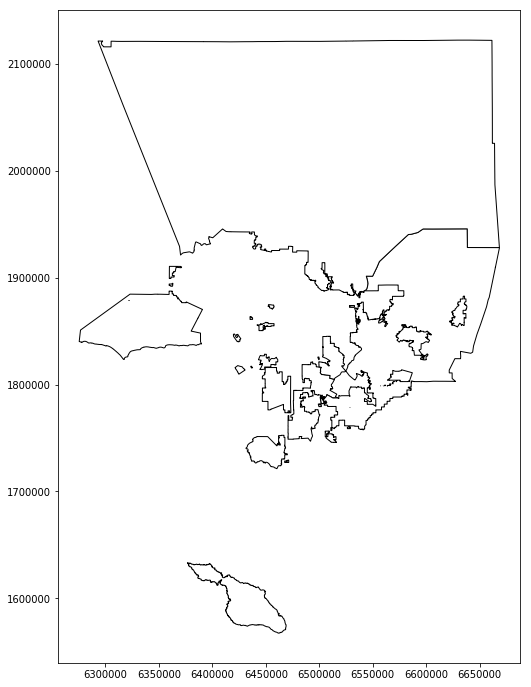

In [33]:
fire.plot(color='w', edgecolor='k', figsize=(12,12))

#### Census blocks for LA 

In [34]:
!curl -O http://egis3.lacounty.gov/dataportal/wp-content/uploads/ShapefilePackages/CENSUS_BLOCKS_2010.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33.7M  100 33.7M    0     0  1279k      0  0:00:27  0:00:27 --:--:-- 1660k


In [35]:
!unzip CENSUS_BLOCKS_2010.zip

Archive:  CENSUS_BLOCKS_2010.zip
  inflating: CENSUS_BLOCKS_2010.cpg  
  inflating: CENSUS_BLOCKS_2010.dbf  
  inflating: CENSUS_BLOCKS_2010.prj  
  inflating: CENSUS_BLOCKS_2010.sbn  
  inflating: CENSUS_BLOCKS_2010.sbx  
  inflating: CENSUS_BLOCKS_2010.shp  
  inflating: CENSUS_BLOCKS_2010.shp.xml  
  inflating: CENSUS_BLOCKS_2010.shx  


In [36]:
blocks = gp.GeoDataFrame.from_file('CENSUS_BLOCKS_2010.shp')

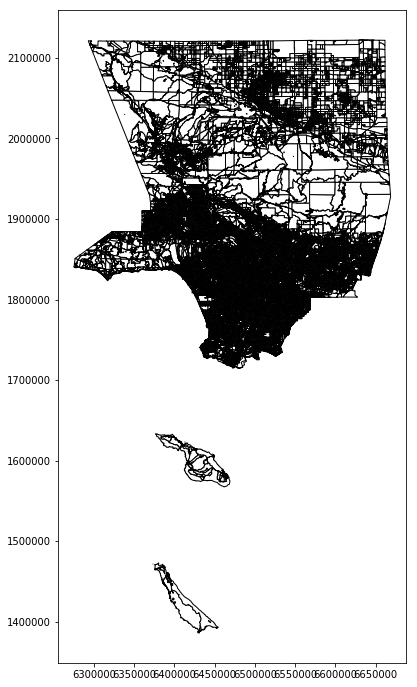

In [37]:
blocks.plot(color='w', edgecolor='k', figsize=(12,12))

#### Using sjoin to find intersection and overlay would not work for so many polygons

In [40]:
intersect_blocks = sjoin(fire, blocks, how='right', op='intersects')

In [41]:
intersect_blocks.head()

,index_left,OBJECTID,Region,Shape_Leng,Shape_STAr_x,Shape_STLe_x,bbox,histreg,CT10,BG10,...,SPA_NAME,SUP_DIST,SUP_LABEL,HOUSING10,POP_2010,CT12,BG12,Shape_STAr_y,Shape_STLe_y,geometry
index_right,,,,,,,,,,,,,,,,,,,,,
59844,0.0,1.0,Central,1.659514e+06,9.903027e+09,1.659514e+06,"(6275507.648340091, 1567513.5548830926, 651725...","[90967, 77327, 77368, 35649, 63129, 8654, 9089...",228900,2289002,...,South,2,District 2,0,0,228900,2289002,399758.824219,4437.501490,"POLYGON ((6489537.788520426 1818658.717618003,..."
100951,0.0,1.0,Central,1.659514e+06,9.903027e+09,1.659514e+06,"(6275507.648340091, 1567513.5548830926, 651725...","[90967, 77327, 77368, 35649, 63129, 8654, 9089...",532500,5325001,...,East,1,District 1,0,1,532500,5325001,116305.930664,1382.063220,"POLYGON ((6492047.545968086 1819216.230938673,..."
46081,0.0,1.0,Central,1.659514e+06,9.903027e+09,1.659514e+06,"(6275507.648340091, 1567513.5548830926, 651725...","[90967, 77327, 77368, 35649, 63129, 8654, 9089...",532500,5325001,...,East,1,District 1,3,10,532500,5325001,194666.866211,1833.359288,"POLYGON ((6492047.10764876 1819555.04292509, 6..."
73606,0.0,1.0,Central,1.659514e+06,9.903027e+09,1.659514e+06,"(6275507.648340091, 1567513.5548830926, 651725...","[90967, 77327, 77368, 35649, 63129, 8654, 9089...",532500,5325001,...,East,1,District 1,3,16,532500,5325001,192205.986328,1812.686774,"POLYGON ((6492622.449673921 1820223.713503748,..."
93723,0.0,1.0,Central,1.659514e+06,9.903027e+09,1.659514e+06,"(6275507.648340091, 1567513.5548830926, 651725...","[90967, 77327, 77368, 35649, 63129, 8654, 9089...",532500,5325001,...,East,1,District 1,0,0,532500,5325001,3633.689453,688.107431,"POLYGON ((6492051.667022839 1820223.920524344,..."


In [42]:
intersect_blocks.shape

(109390, 33)

In [43]:
blocks.shape

(109279, 25)

In [44]:
fire.shape

(3, 8)

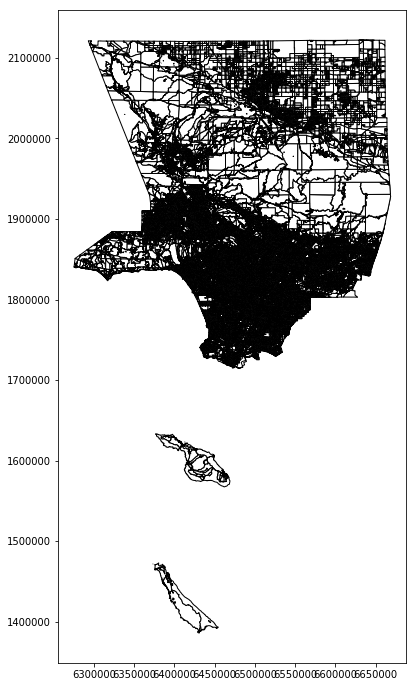

In [45]:
intersect_blocks.plot(color='w', edgecolor='k', figsize=(12,12))

#### LA county with census blocks under fire boundaries